In [88]:
import pandas as pd
import nasdaqdatalink as nddl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import os
import hvplot.pandas

# store the api key (just the key in a text file with this name)
nddl.read_key(filename="nasdaqdatalinkapikey.txt")


In [2]:
# get the indicator table
zindicators = nddl.get_table("ZILLOW/INDICATORS")
zindicators

,indicator_id,indicator,category
None,,,
0,ZSFH,ZHVI Single-Family Homes Time Series ($),Home values
1,ZCON,ZHVI Condo/Co-op Time Series ($),Home values
2,ZATT,ZHVI All Homes- Top Tier Time Series ($),Home values
3,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",Home values
4,ZABT,ZHVI All Homes- Bottom Tier Time Series ($),Home values
5,Z5BR,ZHVI 5+ Bedroom Time Series ($),Home values
6,Z4BR,ZHVI 4-Bedroom Time Series ($),Home values
7,Z3BR,ZHVI 3-Bedroom Time Series ($),Home values
8,Z2BR,ZHVI 2-Bedroom Time Series ($),Home values


directory already exist


In [7]:
# retrieve smooth median house price data
# get the data table by indicator (the whole table is huge), paginate= True will retrieve more than 10K rows, otherwise limit to 10K rows.
sssm_data = nddl.get_table("ZILLOW/DATA", indicator_id='SSSM', paginate=True)
sssm_data

,indicator_id,region_id,date,value
None,,,,
0,SSSM,845167,2023-08-31,134667.0
1,SSSM,845167,2023-07-31,134000.0
2,SSSM,845167,2023-06-30,140167.0
3,SSSM,845167,2023-05-31,138000.0
4,SSSM,845167,2023-04-30,136333.0
...,...,...,...,...
92553,SSSM,102001,2008-06-30,186667.0
92554,SSSM,102001,2008-05-31,183333.0
92555,SSSM,102001,2008-04-30,180167.0


In [4]:
# get SRSM, raw median price data
srsm_data = nddl.get_table("ZILLOW/DATA", indicator_id='SRSM', paginate=True)
srsm_data

,indicator_id,region_id,date,value
None,,,,
0,SRSM,845167,2023-08-31,134000.0
1,SRSM,845167,2023-07-31,130000.0
2,SRSM,845167,2023-06-30,140000.0
3,SRSM,845167,2023-05-31,132000.0
4,SRSM,845167,2023-04-30,148500.0
...,...,...,...,...
93090,SRSM,102001,2008-06-30,192000.0
93091,SRSM,102001,2008-05-31,185000.0
93092,SRSM,102001,2008-04-30,183000.0


In [39]:
# For-Sale Inventory (Smooth, SFR only, Monthly) ISSM
issm = nddl.get_table("ZILLOW/DATA", indicator_id='ISSM', paginate=True)
issm

,indicator_id,region_id,date,value
None,,,,
0,ISSM,845172,2023-08-31,143.0
1,ISSM,845172,2023-07-31,132.0
2,ISSM,845172,2023-06-30,123.0
3,ISSM,845172,2023-05-31,112.0
4,ISSM,845172,2023-04-30,101.0
...,...,...,...,...
60986,ISSM,102001,2018-02-28,1269727.0
60987,ISSM,102001,2018-01-31,1330723.0
60988,ISSM,102001,2017-12-31,1365095.0


In [13]:
# retrieve raw inventory data
irsm = nddl.get_table("ZILLOW/DATA", indicator_id='IRSM', paginate=True)
irsm

,indicator_id,region_id,date,value
None,,,,
0,IRSM,845172,2023-09-30,164.0
1,IRSM,845172,2023-08-31,156.0
2,IRSM,845172,2023-07-31,142.0
3,IRSM,845172,2023-06-30,132.0
4,IRSM,845172,2023-05-31,121.0
...,...,...,...,...
63474,IRSM,102001,2018-02-28,1224382.0
63475,IRSM,102001,2018-01-31,1206651.0
63476,IRSM,102001,2017-12-31,1228911.0


In [68]:
# SRAM, Median Sale Price (Raw, All Homes, Monthly), meaning all house types, previously SSSM is for SFR (single family residence)
sram = nddl.get_table("ZILLOW/DATA", indicator_id='SRAM', paginate=True)
sram

,indicator_id,region_id,date,value
None,,,,
0,SRAM,845167,2023-08-31,134000.0
1,SRAM,845167,2023-07-31,130000.0
2,SRAM,845167,2023-06-30,140000.0
3,SRAM,845167,2023-05-31,133500.0
4,SRAM,845167,2023-04-30,148500.0
...,...,...,...,...
94964,SRAM,102001,2008-06-30,195000.0
94965,SRAM,102001,2008-05-31,189000.0
94966,SRAM,102001,2008-04-30,186000.0


In [11]:
# get all the regions table
zregions = nddl.get_table("ZILLOW/REGIONS", paginate=True)
zregions

,region_id,region_type,region
None,,,
0,99999,zip,"98847;WA;Wenatchee, WA;Leavenworth;Chelan County"
1,99998,zip,98846;WA;nan;Pateros;Okanogan County
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844;WA;nan;Oroville;Okanogan County
4,99995,zip,"98843;WA;Wenatchee, WA;Orondo;Douglas County"
...,...,...,...
89300,100000,zip,"98848;WA;Moses Lake, WA;Quincy;Grant County"
89301,10000,city,Bloomington;MD;nan;Garrett County
89302,1000,county,"Echols County;GA;Valdosta, GA"


In [36]:
zregions['region_id'] = zregions['region_id'].astype('int64')

In [37]:
zregions.dtypes

region_id       int64
region_type    object
region         object
dtype: object

In [10]:
# combine data and region df
sssm_combine = pd.merge(sssm_data, zregions)
sssm_combine

NameError: name 'zregions' is not defined

In [16]:
# combine data and region df raw
srsm_combine = pd.merge(srsm_data, zregions)
srsm_combine

,indicator_id,region_id,date,value,region_type,region
0,SRSM,845167,2023-08-31,134000.0,metro,"Ottawa, IL"
1,SRSM,845167,2023-07-31,130000.0,metro,"Ottawa, IL"
2,SRSM,845167,2023-06-30,140000.0,metro,"Ottawa, IL"
3,SRSM,845167,2023-05-31,132000.0,metro,"Ottawa, IL"
4,SRSM,845167,2023-04-30,148500.0,metro,"Ottawa, IL"
...,...,...,...,...,...,...
93090,SRSM,102001,2008-06-30,192000.0,metro,United States
93091,SRSM,102001,2008-05-31,185000.0,metro,United States
93092,SRSM,102001,2008-04-30,183000.0,metro,United States
93093,SRSM,102001,2008-03-31,182000.0,metro,United States


In [72]:
sram_combine = pd.merge(sram, zregions)
sram_combine.head()

array(['metro'], dtype=object)

In [74]:
sram_combine[['City', 'State']] = sram_combine['region'].str.split(', ', expand=True)
sram_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'MS', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI',
       'ME', 'NE', 'MT', 'ND', 'NC; NC', 'DE', 'AK', None], dtype=object)

In [18]:
# create new columns City and State
srsm_combine[['City', 'State']]= srsm_combine['region'].str.split(', ', expand=True)
srsm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SRSM,845167,2023-08-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SRSM,845167,2023-07-31,130000.0,metro,"Ottawa, IL",Ottawa,IL
2,SRSM,845167,2023-06-30,140000.0,metro,"Ottawa, IL",Ottawa,IL
3,SRSM,845167,2023-05-31,132000.0,metro,"Ottawa, IL",Ottawa,IL
4,SRSM,845167,2023-04-30,148500.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
93090,SRSM,102001,2008-06-30,192000.0,metro,United States,United States,None
93091,SRSM,102001,2008-05-31,185000.0,metro,United States,United States,None
93092,SRSM,102001,2008-04-30,183000.0,metro,United States,United States,None
93093,SRSM,102001,2008-03-31,182000.0,metro,United States,United States,None


In [29]:
srsm_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI', 'ME',
       'NE', 'MT', 'ND', 'MS', 'NC; NC', 'DE', 'AK', None], dtype=object)

In [30]:
# data cleaning
# replace (probably input error) "NC; NC" with "NC"
srsm_combine['State'] = srsm_combine['State'].str.replace("NC; NC", "NC")

In [75]:
sram_combine['State'] = sram_combine['State'].str.replace("NC; NC", "NC")
sram_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'MS', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI',
       'ME', 'NE', 'MT', 'ND', 'DE', 'AK', None], dtype=object)

In [60]:
sssm_combine[['City', 'State']]= sssm_combine['region'].str.split(', ', expand=True)
# sssm_combine['State'] = sssm_combine['State'].str.strip()
sssm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL",Ottawa,IL
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL",Ottawa,IL
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL",Ottawa,IL
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,None
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,None
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,None
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,None


In [76]:
# replace (probably input error) "NC; NC" with "NC"
sssm_combine['State'] = sssm_combine['State'].str.replace("NC; NC", "NC")

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_7632\1802012052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sssm_combine['State'] = sssm_combine['State'].str.replace("NC; NC", "NC")


In [77]:
sssm_combine.State.unique()

array(['IL', 'NH', 'TX', 'IN', 'AZ', 'NY', 'OH', 'IA', 'MN', 'TN', 'WI',
       'OK', 'HI', 'OR', 'CO', 'CA', 'NC', 'AL', 'KS', 'FL', 'AR', 'MI',
       'GA', 'MD', 'VA', 'KY', 'PA', 'WA', 'MA', 'WV', 'MO', 'DC', 'NJ',
       'UT', 'ID', 'CT', 'NM', 'SC', 'SD', 'LA', 'WY', 'NV', 'RI', 'ME',
       'NE', 'MT', 'MS', 'ND', 'DE', 'AK'], dtype=object)

In [63]:
sssm_combine[sssm_combine['State'].isin([None, 'NC; NC'])]


,indicator_id,region_id,date,value,region_type,region,City,State
67890,SSSM,394546,2020-08-31,217733.0,metro,"Dunn, NC; NC",Dunn,NC; NC
67891,SSSM,394546,2020-07-31,212750.0,metro,"Dunn, NC; NC",Dunn,NC; NC
67892,SSSM,394546,2020-06-30,210333.0,metro,"Dunn, NC; NC",Dunn,NC; NC
67893,SSSM,394546,2020-05-31,206417.0,metro,"Dunn, NC; NC",Dunn,NC; NC
67894,SSSM,394546,2020-04-30,202083.0,metro,"Dunn, NC; NC",Dunn,NC; NC
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,None
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,None
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,None
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,None


In [71]:
sssm_combine.describe(include='all')

,indicator_id,region_id,date,value,region_type,region,City,State
count,90519,90519.000000,90519,9.051900e+04,90519,90519,90519,90519
unique,1,NaN,186,NaN,1,727,649,51
top,SSSM,NaN,2022-07-31,NaN,metro,"Dayton, OH",Springfield,CA
freq,90519,NaN,698,NaN,90519,357,728,5658
mean,NaN,413695.955733,NaN,2.010901e+05,NaN,NaN,NaN,NaN
std,NaN,82454.997162,NaN,1.253769e+05,NaN,NaN,NaN,NaN
min,NaN,394298.000000,NaN,2.050000e+04,NaN,NaN,NaN,NaN
25%,NaN,394547.000000,NaN,1.281325e+05,NaN,NaN,NaN,NaN
50%,NaN,394803.000000,NaN,1.652360e+05,NaN,NaN,NaN,NaN
75%,NaN,395056.000000,NaN,2.295380e+05,NaN,NaN,NaN,NaN


In [32]:
srsm_combine.describe(include='all')

,indicator_id,region_id,date,value,region_type,region,City,State
count,93095,93095,93095,9.309500e+04,93095,93095,93095,92908
unique,1,733,NaN,NaN,1,732,653,50
top,SRSM,845167,NaN,NaN,metro,"Dayton, OH",Springfield,CA
freq,93095,187,NaN,NaN,93095,360,736,5717
mean,NaN,NaN,2016-07-12 08:38:12.677372672,2.023736e+05,NaN,NaN,NaN,NaN
min,NaN,NaN,2008-02-29 00:00:00,1.600000e+04,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012-10-31 00:00:00,1.289500e+05,NaN,NaN,NaN,NaN
50%,NaN,NaN,2016-09-30 00:00:00,1.662500e+05,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020-05-31 00:00:00,2.310000e+05,NaN,NaN,NaN,NaN
max,NaN,NaN,2023-08-31 00:00:00,1.895000e+06,NaN,NaN,NaN,NaN


# Do NOT run when combining code if the CSV files already exist

In [ ]:

# create directory to store data (csv files)
dirpath = ('./data')
if not os.path.exists(dirpath):
    os.makedirs(dirpath)
    print('created ./data/ directory')
else:
    print('./data directory already exist')

In [89]:
# save pd to csv file for use next time without calling API again
zindicators.to_csv('./data/zindicators.csv')
zregions.to_csv('./data/zillow_region.csv')

sssm_data.to_csv('./data/sssm_full.csv')
srsm_data.to_csv('./data/srsm_full.csv')

sssm_combine.to_csv('./data/sssm_combine.csv')
srsm_combine.to_csv('./data/srsm_combine.csv')
sram_combine.to_csv('./data/sram_combine.csv')

irsm.to_csv('./data/irsm_full.csv')
issm.to_csv('./data/issm.csv')


## Findings about sssm_combine  
  - It contains smooth metropolitan area monthly median house price over the years ( in each state as well as the whole of US (region = 'United States'), 90705 rows x 8 columns.  
  - The date range may defer from city to city.   
  - Different states have different numbers of metro area (AK, Alaska, only has 1, CA, california, has 34.  
  - The difference between smoothed and raw data on Zillow is that the former removes 'spikes' in the raw data to make the chart look 'smoother', which is fine for our purpose. Data wise, the smoothed data will have their tail components adjusted to give the graph a "smoother" appearance, otherwise the raw data may have many "steps" or small flat lines. (e.g 130,750 (smooth) vs 130,000 (raw)). According to Zillow, the adjustment may also be for seasonal reason.  
      - The raw data also have slightly more data points than the smoothed data (93075 vs 92558, 0.56% less).  
      - Raw data also has State typo (eg. "NC; NC"), which may be introduced during data input.
### To do:  
  1. -find the city with the longest data period (groupby region, count)    (Dayton, 357 pt)
  2. -plot that city with the national data  
  3. plot the cities in CA.  
  4. get the number of cities in each state.

In [3]:
sssm_combine = pd.read_csv('./data/sssm_combine.csv', parse_dates=['date'])
# drop the first col (index number)
sssm_combine = sssm_combine.drop(sssm_combine.columns[0], axis=1)
sssm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL",Ottawa,IL
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL",Ottawa,IL
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL",Ottawa,IL
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,NaN
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,NaN
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,NaN
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,NaN


In [4]:
srsm_combine = pd.read_csv('./data/srsm_combine.csv', parse_dates=['date'])
# drop the first col (index number)
srsm_combine = srsm_combine.drop(srsm_combine.columns[0], axis=1)
srsm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SRSM,845167,2023-08-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SRSM,845167,2023-07-31,130000.0,metro,"Ottawa, IL",Ottawa,IL
2,SRSM,845167,2023-06-30,140000.0,metro,"Ottawa, IL",Ottawa,IL
3,SRSM,845167,2023-05-31,132000.0,metro,"Ottawa, IL",Ottawa,IL
4,SRSM,845167,2023-04-30,148500.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
93090,SRSM,102001,2008-06-30,192000.0,metro,United States,United States,NaN
93091,SRSM,102001,2008-05-31,185000.0,metro,United States,United States,NaN
93092,SRSM,102001,2008-04-30,183000.0,metro,United States,United States,NaN
93093,SRSM,102001,2008-03-31,182000.0,metro,United States,United States,NaN


In [5]:
srsm_combine.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
City                    object
State                   object
dtype: object

In [6]:
issm =pd.read_csv('./data/issm.csv', parse_dates=['date'])
issm= issm.drop(issm.columns[0], axis=1)
issm.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [7]:
issm.head()

,indicator_id,region_id,date,value
0,ISSM,845172,2023-08-31,143.0
1,ISSM,845172,2023-07-31,132.0
2,ISSM,845172,2023-06-30,123.0
3,ISSM,845172,2023-05-31,112.0
4,ISSM,845172,2023-04-30,101.0


In [8]:
irsm =pd.read_csv('./data/irsm.csv', parse_dates=['date'])
irsm= irsm.drop(irsm.columns[0], axis=1)
irsm.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
dtype: object

In [9]:
sssm_combine.dtypes

indicator_id            object
region_id                int64
date            datetime64[ns]
value                  float64
region_type             object
region                  object
City                    object
State                   object
dtype: object

In [10]:
# extract national data in sssm_combine
usa_sssm_comb = sssm_combine[sssm_combine['State'].isnull() ]
usa_sssm_comb

,indicator_id,region_id,date,value,region_type,region,City,State
90519,SSSM,102001,2023-07-31,369384.0,metro,United States,United States,NaN
90520,SSSM,102001,2023-06-30,363051.0,metro,United States,United States,NaN
90521,SSSM,102001,2023-05-31,353333.0,metro,United States,United States,NaN
90522,SSSM,102001,2023-04-30,342167.0,metro,United States,United States,NaN
90523,SSSM,102001,2023-03-31,332833.0,metro,United States,United States,NaN
...,...,...,...,...,...,...,...,...
90700,SSSM,102001,2008-06-30,186694.0,metro,United States,United States,NaN
90701,SSSM,102001,2008-05-31,183360.0,metro,United States,United States,NaN
90702,SSSM,102001,2008-04-30,180194.0,metro,United States,United States,NaN
90703,SSSM,102001,2008-03-31,189750.0,metro,United States,United States,NaN


In [11]:
# extract national data in srsm_combine
usa_srsm_comb = srsm_combine[srsm_combine['State'].isnull() ]
usa_srsm_comb

,indicator_id,region_id,date,value,region_type,region,City,State
92908,SRSM,102001,2023-08-31,365000.0,metro,United States,United States,NaN
92909,SRSM,102001,2023-07-31,367000.0,metro,United States,United States,NaN
92910,SRSM,102001,2023-06-30,372000.0,metro,United States,United States,NaN
92911,SRSM,102001,2023-05-31,365000.0,metro,United States,United States,NaN
92912,SRSM,102001,2023-04-30,350000.0,metro,United States,United States,NaN
...,...,...,...,...,...,...,...,...
93090,SRSM,102001,2008-06-30,192000.0,metro,United States,United States,NaN
93091,SRSM,102001,2008-05-31,185000.0,metro,United States,United States,NaN
93092,SRSM,102001,2008-04-30,183000.0,metro,United States,United States,NaN
93093,SRSM,102001,2008-03-31,182000.0,metro,United States,United States,NaN


In [12]:
# remove national data from sssm_combine
sssm_combine = sssm_combine.dropna()
sssm_combine

,indicator_id,region_id,date,value,region_type,region,City,State
0,SSSM,845167,2023-07-31,134000.0,metro,"Ottawa, IL",Ottawa,IL
1,SSSM,845167,2023-06-30,140167.0,metro,"Ottawa, IL",Ottawa,IL
2,SSSM,845167,2023-05-31,138000.0,metro,"Ottawa, IL",Ottawa,IL
3,SSSM,845167,2023-04-30,136333.0,metro,"Ottawa, IL",Ottawa,IL
4,SSSM,845167,2023-03-31,132167.0,metro,"Ottawa, IL",Ottawa,IL
...,...,...,...,...,...,...,...,...
90514,SSSM,394298,2023-02-28,289833.0,metro,"Aberdeen, WA",Aberdeen,WA
90515,SSSM,394298,2023-01-31,293500.0,metro,"Aberdeen, WA",Aberdeen,WA
90516,SSSM,394298,2022-09-30,312000.0,metro,"Aberdeen, WA",Aberdeen,WA
90517,SSSM,394298,2022-08-31,326833.0,metro,"Aberdeen, WA",Aberdeen,WA


In [13]:
# remove country-wide data from srsm_combine
srsm_combine = srsm_combine.dropna()
srsm_combine.tail()

,indicator_id,region_id,date,value,region_type,region,City,State
92903,SRSM,394298,2023-02-28,293000.0,metro,"Aberdeen, WA",Aberdeen,WA
92904,SRSM,394298,2023-01-31,292500.0,metro,"Aberdeen, WA",Aberdeen,WA
92905,SRSM,394298,2022-09-30,282500.0,metro,"Aberdeen, WA",Aberdeen,WA
92906,SRSM,394298,2022-08-31,315000.0,metro,"Aberdeen, WA",Aberdeen,WA
92907,SRSM,394298,2022-07-31,338500.0,metro,"Aberdeen, WA",Aberdeen,WA


In [14]:
sssm_combine.groupby('region')['State'].count().sort_values()

region
Fort Dodge, IA          1
Coeur d'Alene, ID       1
Lewisburg, PA           1
Las Vegas, NM           1
Union City, TN          1
                     ... 
Portland, OR          186
Port St. Lucie, FL    186
Detroit, MI           186
Ocala, FL             186
Dayton, OH            357
Name: State, Length: 727, dtype: int64

In [15]:
srsm_combine.groupby('region')['State'].count().sort_values()

region
Lewisburg, PA       1
Las Vegas, NM       1
Athens, OH          1
Fairmont, WV        1
Kearney, NE         1
                 ... 
Eau Claire, WI    187
El Paso, TX       187
Nashville, TN     187
Lawton, OK        187
Dayton, OH        360
Name: State, Length: 731, dtype: int64

In [16]:
# extract Dayton, OH smooth data points
dayton = sssm_combine[sssm_combine['region']== 'Dayton, OH']
dayton_39 = dayton[dayton['region_id'] == 394521]
dayton_39.sort_values(by='date').tail()

,indicator_id,region_id,date,value,region_type,region,City,State
69956,SSSM,394521,2022-02-28,180300.0,metro,"Dayton, OH",Dayton,OH
69955,SSSM,394521,2022-03-31,172750.0,metro,"Dayton, OH",Dayton,OH
69954,SSSM,394521,2022-04-30,174000.0,metro,"Dayton, OH",Dayton,OH
69953,SSSM,394521,2022-05-31,187333.0,metro,"Dayton, OH",Dayton,OH
69952,SSSM,394521,2022-06-30,199667.0,metro,"Dayton, OH",Dayton,OH


In [123]:
# extract Dayton, OH Raw data points
dayton_r = srsm_combine[srsm_combine['region']== 'Dayton, OH']
# dayton_r.region_id.unique()
dayton_39r = dayton_r[dayton_r['region_id'] == 394521]
dayton_39r.sort_values(by='date').tail()

,indicator_id,region_id,date,value,region_type,region,City,State
71997,SRSM,394521,2022-02-28,174900.0,metro,"Dayton, OH",Dayton,OH
71996,SRSM,394521,2022-03-31,175000.0,metro,"Dayton, OH",Dayton,OH
71995,SRSM,394521,2022-04-30,175000.0,metro,"Dayton, OH",Dayton,OH
71994,SRSM,394521,2022-05-31,212000.0,metro,"Dayton, OH",Dayton,OH
71993,SRSM,394521,2022-06-30,212000.0,metro,"Dayton, OH",Dayton,OH


In [18]:
# extract new york raw data points
ny_r = srsm_combine[srsm_combine['region']== 'New York, NY']
ny_r.head()

,indicator_id,region_id,date,value,region_type,region,City,State
35875,SRSM,394913,2023-08-31,650000.0,metro,"New York, NY",New York,NY
35876,SRSM,394913,2023-07-31,630000.0,metro,"New York, NY",New York,NY
35877,SRSM,394913,2023-06-30,620000.0,metro,"New York, NY",New York,NY
35878,SRSM,394913,2023-05-31,599000.0,metro,"New York, NY",New York,NY
35879,SRSM,394913,2023-04-30,566500.0,metro,"New York, NY",New York,NY


In [19]:
# extract Killeen raw data points
killeen_r = srsm_combine[srsm_combine['region']== 'Killeen, TX']
len(killeen_r)
killeen_r.region_id.unique()
killeen_r

,indicator_id,region_id,date,value,region_type,region,City,State
51231,SRSM,394746,2023-08-31,258000.0,metro,"Killeen, TX",Killeen,TX
51232,SRSM,394746,2023-07-31,255000.0,metro,"Killeen, TX",Killeen,TX
51233,SRSM,394746,2023-06-30,270000.0,metro,"Killeen, TX",Killeen,TX
51234,SRSM,394746,2023-05-31,265000.0,metro,"Killeen, TX",Killeen,TX
51235,SRSM,394746,2023-04-30,250000.0,metro,"Killeen, TX",Killeen,TX
...,...,...,...,...,...,...,...,...
51413,SRSM,394746,2008-06-30,117000.0,metro,"Killeen, TX",Killeen,TX
51414,SRSM,394746,2008-05-31,116500.0,metro,"Killeen, TX",Killeen,TX
51415,SRSM,394746,2008-04-30,106500.0,metro,"Killeen, TX",Killeen,TX
51416,SRSM,394746,2008-03-31,99900.0,metro,"Killeen, TX",Killeen,TX


In [20]:
# extract Davenport raw data points
davenport_r = srsm_combine[srsm_combine['region'] == 'Davenport, IA']
davenport_r.region_id.unique()

array([394520], dtype=int64)

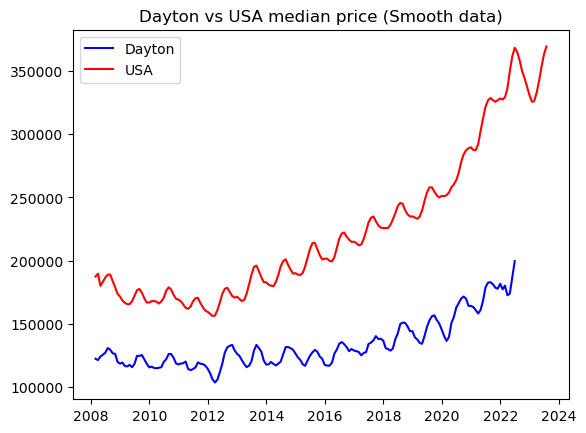

In [125]:
# plotting dayton vs USA smooth
dayton_39 = dayton_39.sort_values(by='date')
usa_sssm_comb= usa_sssm_comb.sort_values(by='date')
plt.plot(dayton_39['date'], dayton_39['value'], color='b',label='Dayton')
plt.plot(usa_sssm_comb['date'], usa_sssm_comb['value'], color='r', label='USA')
plt.title('Dayton vs USA median price (Smooth data)')
plt.legend()
plt.show()

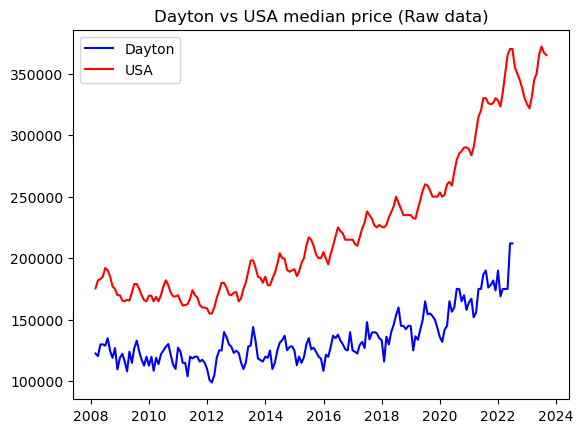

In [124]:
# plotting dayton vs USA for raw
dayton_39r= dayton_39r.sort_values(by='date')
usa_srsm_comb= usa_srsm_comb.sort_values(by='date')
plt.plot(dayton_39r['date'], dayton_39r['value'], color='b',label='Dayton')
plt.plot(usa_srsm_comb['date'], usa_srsm_comb['value'], color='r', label='USA')
plt.title('Dayton vs USA median price (Raw data)')
plt.legend()
plt.show()

## Finding on Smooth vs Raw data sets  
- The raw data has more spikes compared to the smooth data (thus the name 'smooth')
- As expected the correlation also dropped slightly (0.95 for smooth to 0.93 for raw)

In [24]:
# wrangling data for scatter plot

# getting the listing for Dayton, OH
dayton_inventory = issm[issm['region_id'] == 394521]
len(dayton_inventory.sort_values(by='date'))

58

In [25]:
# getting the listing (raw) for Dayton, OH
dayton_inventory_r = irsm[irsm['region_id'] == 394521]
len(dayton_inventory_r.sort_values(by='date'))

58

In [26]:
# combining price and listing
dayton_sssm_issm = pd.merge(dayton_39, dayton_inventory, on='date',suffixes=['_price','_listing'])
len(dayton_sssm_issm)

57

In [27]:
# combining price and listing (raw)
dayton_srsm_irsm = pd.merge(dayton_39r, dayton_inventory_r, on='date',suffixes=['_price','_listing'])
len(dayton_srsm_irsm)

57

In [28]:
# extract columns for scatter plot
dayton_sssm_issm_sc_df= dayton_sssm_issm[['date','value_price','value_listing']]
dayton_sssm_issm_sc_df.head()

,date,value_price,value_listing
0,2017-10-31,138100.0,3268.0
1,2017-11-30,138350.0,3129.0
2,2017-12-31,136850.0,2973.0
3,2018-01-31,130875.0,2871.0
4,2018-02-28,130188.0,2711.0


In [29]:
# extract columns for scatter plot
dayton_srsm_irsm_sc_df= dayton_srsm_irsm[['date','value_price','value_listing']]
dayton_srsm_irsm_sc_df.head()

,date,value_price,value_listing
0,2017-10-31,139000.0,3268.0
1,2017-11-30,135000.0,2989.0
2,2017-12-31,133500.0,2661.0
3,2018-01-31,116000.0,2566.0
4,2018-02-28,136250.0,2628.0


In [30]:
# get the linear regression parameters smooth data
(slope, intercept, rvalue, pval, stderr) = stats.linregress(dayton_sssm_issm_sc_df['value_listing'],\
                                                            dayton_sssm_issm_sc_df['value_price'])
rvalue

-0.6584208628006581

r squared value is 0.43352


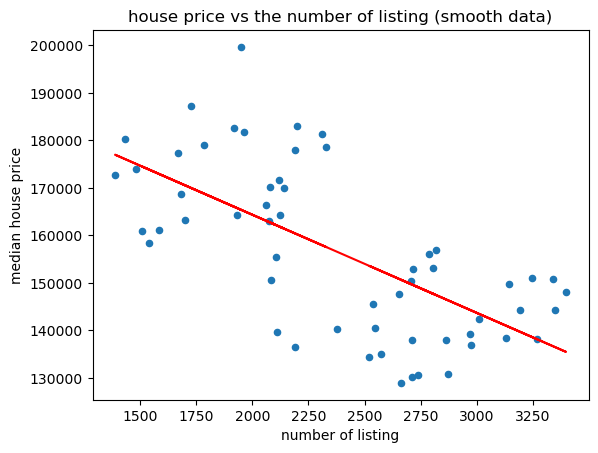

In [33]:
# plot the scatter plot and regression line with smooth data
dayton_sssm_issm_sc_df.plot(kind='scatter',x='value_listing', y='value_price', title='house price vs the number of listing (smooth data)',\
                            ylabel='median house price', xlabel = 'number of listing')
regr_yval = dayton_sssm_issm_sc_df['value_listing']*slope + intercept
plt.plot(dayton_sssm_issm_sc_df['value_listing'], regr_yval, color='r')
print(f'r squared value is {rvalue**2:.5f}')

In [35]:
# linear regression for raw
(slope_r, intercept_r, rvalue_r, pval_r, stderr_r) = stats.linregress(dayton_srsm_irsm_sc_df['value_listing'],\
                                                            dayton_srsm_irsm_sc_df['value_price'])
rvalue_r

-0.5100467308751206

r squared value is 0.26015


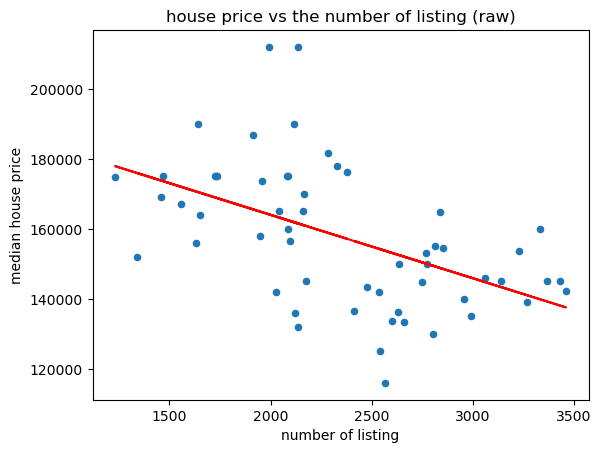

In [36]:
# plot the scatter plot and regression line for raw
dayton_srsm_irsm_sc_df.plot(kind='scatter',x='value_listing', y='value_price', title='house price vs the number of listing (raw)',\
                           ylabel='median house price', xlabel='number of listing')
regr_yval_r = dayton_srsm_irsm_sc_df['value_listing']*slope_r + intercept_r
plt.plot(dayton_srsm_irsm_sc_df['value_listing'], regr_yval_r, color='r')
print(f'r squared value is {rvalue_r**2:.5f}')

## Finding on linear regression for smooth vs raw
- From the graph we can we that there is generally a negative correlation between the house price and number of listing. This makes sense from a supply-demand perspective. As the more supply (listing) there is, the lower the price will be given the same demand. The r-squared value is significant, meaning the regression model is quite reliable.  
    - Comparing the smooth to raw, the smooth data has higher r-squred value (0.43 vs 0.26), meaning the linear regression model using smoothed data is more predictable, because the data seems to have been 'compacted' during the smoothing process as we can see the data points are closer together to the regression line in the smooth dataset.


In [86]:
# Display the location of New York, Killeen and Davenport on a map, with median price as size of the dot
# NY 40.7128° N, 74.0060° W (40.7128, -74.0060)
# Killeen, TX 31.1171° N, 97.7278° W (31.1171, -97.7278)
# Davenport, IA 41.5236° N, 90.5776° W (41.5236, -90.5776)
data ={'City': ['New York, NY', "Killeen, TX", "Davenport, IA"],
      'Lat': [40.7128, 31.1171, 41.5236 ],
      'Lng': [-74.0060, -97.7278, -90.5776],
      'Price':[ ny_r.loc[min(ny_r.index), 'value'], killeen_r.loc[min(killeen_r.index), 'value'], \
               davenport_r.loc[min(davenport_r.index), 'value'] ]
               }
city_df = pd.DataFrame(data)
city_df


,City,Lat,Lng,Price
0,"New York, NY",40.7128,-74.0060,650000.0
1,"Killeen, TX",31.1171,-97.7278,258000.0
2,"Davenport, IA",41.5236,-90.5776,185000.0


In [115]:
%%capture --no-display
usa_extent = (-130, 24, -64, 50)
map_pl = city_df.hvplot.points("Lng", "Lat", geo=True, tiles="OSM", size="Price", scale=0.05, color= "City", frame_height=550, \
                              frame_width=750, #x_range=usa_extent[0:2], y_range=usa_extent[2:]
                              xlim=(-127, -64), ylim=(35,40)
                              )
map_pl

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (City,Price)

# Explanation  
  The locations of the cities that we have chosen as the representation of the 3 city sizes (big, medium, small). The dot size indicates the relative median house price in each city.

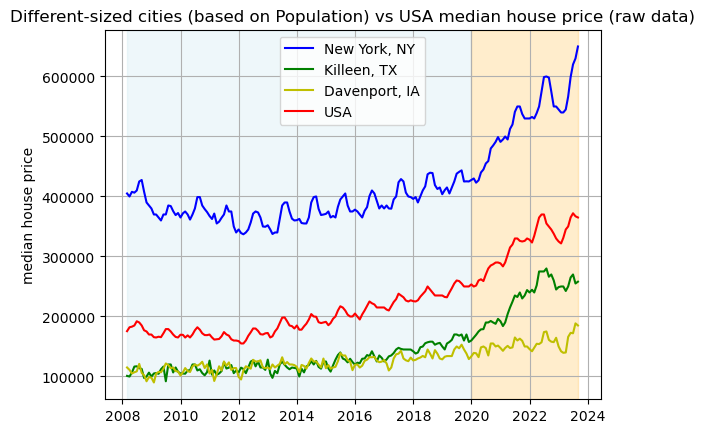

In [66]:
# plotting big city (NY), Medium city (Killeen, TX), small city (Davenport) vs USA for raw
# source: https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

#show background for before and after covid in colors.
ny_r = ny_r.sort_values(by='date')
killeen_r =killeen_r.sort_values(by='date')
usa_srsm_comb = usa_srsm_comb.sort_values(by='date')

fig, ax = plt.subplots()
highlight_date = pd.to_datetime('2020-01-01')

ax.plot(ny_r['date'], ny_r['value'], color='b',label='New York, NY')
ax.plot(killeen_r['date'], killeen_r['value'], color='g',label='Killeen, TX')
ax.plot(davenport_r['date'], davenport_r['value'], color='y',label='Davenport, IA')
ax.plot(usa_srsm_comb['date'], usa_srsm_comb['value'], color='r', label='USA')

# highlight background before covid
ax.axvspan(np.min(ny_r['date']), highlight_date, alpha=0.2, color='lightblue')
# highlight background after covid
ax.axvspan(highlight_date, np.max(ny_r['date']), alpha=0.2, color='orange')

ax.set_title('Different-sized cities (based on Population) vs USA median house price (raw data)')
ax.set_ylabel('median house price')
ax.legend()
ax.grid(True)
plt.show()

## Finding on different sized cities compared to national house price trend
- As expected the big city has the highest price, followed by medium and finally the small city.
- One would expect the big city to have a higher correlation with national price than the smaller ones, because they have a bigger weight when compared to the smaller cities in the calculation of the national price, but it turned out that Killeen (a medium city) has the highest correlation (0.982) vs big city New York's 0.957 and small city Davenport's 0.911. This could be because the national price is a median price which is closest to the medium sized city's price (50th percentile price). As it can be reasonably assumed that when ranked by price, the bigger the city the higher its median price.
- House prices dropped across the country in 2008 because of the Great Financial Crisis (GFC), during which the big city price was impacted the most, while the smaller cities were affected the least. It took NY ten years (2018) to recover the drop in price during the GFC.
- Similar to Australia, the house prices in the US continue to price even more markedly during the pandemic (orange part of the graph)


In [38]:
# calculating correlations with national price
us_dayton = pd.merge( dayton_39[['date','value']], usa_sssm_comb[['date', 'value']], on='date',suffixes=['_dayton', '_us'])
us_dayton_corr = us_dayton['value_dayton'].corr(us_dayton['value_us'])
us_dayton_corr


0.9571157551328646

In [40]:
us_dayton_r = pd.merge( dayton_39r[['date','value']], usa_srsm_comb[['date', 'value']], on='date',suffixes=['_dayton', '_us'])
us_dayton_corr_r = us_dayton_r['value_dayton'].corr(us_dayton_r['value_us'])
us_dayton_corr_r

0.929473459745023

In [41]:
us_ny_r = pd.merge( ny_r[['date','value']], usa_srsm_comb[['date', 'value']], on='date',suffixes=['_ny', '_us'])
us_ny_corr_r = us_ny_r['value_ny'].corr(us_ny_r['value_us'])
us_ny_corr_r

0.959798294656665

In [42]:
us_ki_r = pd.merge( killeen_r[['date','value']], usa_srsm_comb[['date', 'value']], on='date',suffixes=['_ki', '_us'])
us_ki_corr_r = us_ki_r['value_ki'].corr(us_ki_r['value_us'])
us_ki_corr_r

0.9818744099197461

In [43]:
us_dp_r = pd.merge( davenport_r[['date','value']], usa_srsm_comb[['date', 'value']], on='date',suffixes=['_dp', '_us'])
us_dp_corr_r = us_dp_r['value_dp'].corr(us_dp_r['value_us'])
us_dp_corr_r

0.9105031619952351

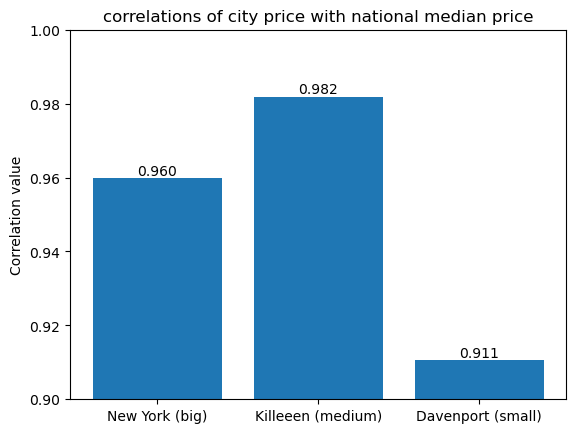

In [67]:
# bar chart for correlation
data=[us_ny_corr_r, us_ki_corr_r, us_dp_corr_r]
labels= ['New York (big)', 'Killeeen (medium)', 'Davenport (small)']
plt.bar(labels, data)
plt.ylim(.9, 1)
plt.title("correlations of city price with national median price")
plt.ylabel('Correlation value')
for i, v in enumerate(data):
    plt.text(i, v, str(f"{v:.3f}"), ha='center', va='bottom')
plt.show()

# Covid time analysis

dayton_covidtime = dayton[(dayton['date'] >= '1-1-2019') & (dayton['date']<='31-12-2023')]
dayton_covidtime

In [120]:
# creating a new column to identify if the date is before or during covid
dayton_covidtime = dayton_covidtime.loc[ dayton_covidtime['region_id'] ==394521, :]
# dayton_covidtime = dayton_covidtime[ dayton_covidtime['region_id'] ==394521]
dayton_covidtime['covid']='during'
dayton_covidtime.head()

,indicator_id,region_id,date,value,region_type,region,City,State,covid
69952,SSSM,394521,2022-06-30,199667.0,metro,"Dayton, OH",Dayton,OH,during
69953,SSSM,394521,2022-05-31,187333.0,metro,"Dayton, OH",Dayton,OH,during
69954,SSSM,394521,2022-04-30,174000.0,metro,"Dayton, OH",Dayton,OH,during
69955,SSSM,394521,2022-03-31,172750.0,metro,"Dayton, OH",Dayton,OH,during
69956,SSSM,394521,2022-02-28,180300.0,metro,"Dayton, OH",Dayton,OH,during


In [56]:
dayton_b4covid = dayton[(dayton['date'] >= '1-1-2014') & (dayton['date']<='31-12-2018')]
dayton_b4covid.head()

,indicator_id,region_id,date,value,region_type,region,City,State
644,SSSM,845158,2018-12-31,137950.0,metro,"Dayton, OH",Dayton,OH
645,SSSM,845158,2018-11-30,137983.0,metro,"Dayton, OH",Dayton,OH
646,SSSM,845158,2018-10-31,141667.0,metro,"Dayton, OH",Dayton,OH
647,SSSM,845158,2018-09-30,142000.0,metro,"Dayton, OH",Dayton,OH
648,SSSM,845158,2018-08-31,147667.0,metro,"Dayton, OH",Dayton,OH


In [57]:
dayton_b4covid = dayton_b4covid[dayton_b4covid['region_id']==394521]
# creating a new column to identify if the date is before or during covid
dayton_b4covid['covid'] = "before"
dayton_b4covid.head()

,indicator_id,region_id,date,value,region_type,region,City,State,covid
69994,SSSM,394521,2018-12-31,144288.0,metro,"Dayton, OH",Dayton,OH,before
69995,SSSM,394521,2018-11-30,144313.0,metro,"Dayton, OH",Dayton,OH,before
69996,SSSM,394521,2018-10-31,148038.0,metro,"Dayton, OH",Dayton,OH,before
69997,SSSM,394521,2018-09-30,150900.0,metro,"Dayton, OH",Dayton,OH,before
69998,SSSM,394521,2018-08-31,151113.0,metro,"Dayton, OH",Dayton,OH,before


In [58]:
# plot the before and after covid dayton side by side
# concat the data vertically.
dayton_b4_during_covid= pd.concat([dayton_b4covid[['date','value','covid']], dayton_covidtime[['date','value','covid']]],axis=0)
dayton_b4_during_covid

,date,value,covid
69994,2018-12-31,144288.0,before
69995,2018-11-30,144313.0,before
69996,2018-10-31,148038.0,before
69997,2018-09-30,150900.0,before
69998,2018-08-31,151113.0,before
...,...,...,...
69989,2019-05-31,140550.0,during
69990,2019-04-30,134331.0,during
69991,2019-03-31,135056.0,during
69992,2019-02-28,137881.0,during


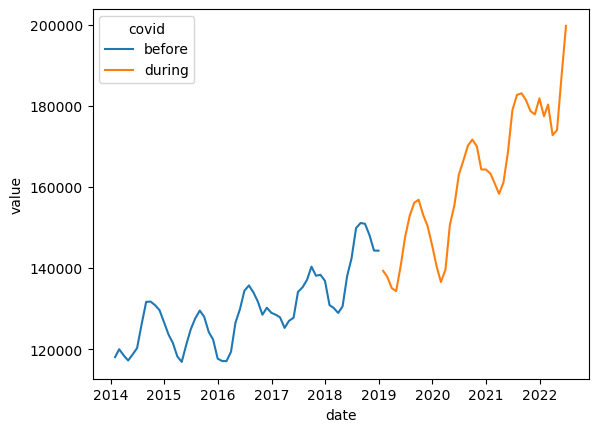

In [107]:
# using seaborn to plot a line graph with different colors for before and during covid.
sns.lineplot(data = dayton_b4_during_covid, x='date', y='value', hue='covid')
plt.legend(title='covid')
plt.show()

## Analysis of house prices before and during covid  
  - It appears that although the pandemic does not affect the cycle of the house price much (still around 1 year), it does amaplify the magnitude of the cycle (there is a bigger difference between the trough and crest of the cycle).  
  - It also appears during covid the price seems less stable as there is more volatility as seen from multiple mini-cycles towards the beginning of 2022.

In [48]:
sssm_subset = sssm_combine.sample(10000)
sssm_subset

,indicator_id,region_id,date,value,region_type,region,City,State
1738,SSSM,753912,2015-10-31,216583.0,metro,"Pinehurst, NC",Pinehurst,NC
74433,SSSM,394477,2019-05-31,102250.0,metro,"Clinton, IA",Clinton,IA
43719,SSSM,394820,2013-07-31,235383.0,metro,"Manchester, NH",Manchester,NH
44063,SSSM,394814,2017-12-31,241333.0,metro,"Madera, CA",Madera,CA
25671,SSSM,395028,2016-04-30,161292.0,metro,"Roanoke, VA",Roanoke,VA
...,...,...,...,...,...,...,...,...
35398,SSSM,394910,2022-07-31,286500.0,metro,"New Orleans, LA",New Orleans,LA
2376,SSSM,753903,2019-10-31,159167.0,metro,"Marietta, OH",Marietta,OH
13517,SSSM,395148,2017-12-31,205250.0,metro,"Tampa, FL",Tampa,FL
86200,SSSM,394347,2020-11-30,282542.0,metro,"Atlanta, GA",Atlanta,GA
